## Linear Regression

### Bike Sharing Assignment


***Reading and Understanding the Data***

#### Loading the necessary libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the source file

In [3]:
bike_sharing = pd.read_csv("E:/GIT_Repository/Python/COURSE_2/Machine_Learning/Bike_Sharing_Assignment/day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Shape of the data(rows,columns)
print("Shape:",bike_sharing.shape)


Shape: (730, 16)


In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Drop the unnecessary columns


Based on the information from the data dictionary, we can drop the below variables.<br>
1. instant - record index. We will not be able to predict anything from the index value<br>
2. dteday - date column. We have year and mnth columns so we dont want this date column. Date value is not required in particular<br>
3. registered and casual - sum of these column values will be present in the `cnt`. Having these columns will have redundant information <br>
4. workingday - It has the data which is complementary with the column `holiday`. So it is better to have only one column.

In [7]:
bike_sharing.drop(['instant','dteday','registered','casual','workingday'], axis = 1, inplace = True)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


## Step 2: Visualising the Data

Visualising the data - to understand the correlation between the variables.
We'll visualise it using `matplotlib` and `seaborn`.<br>

Before designing the model, we need to identify whether there is a relationship between the dependent and independent variables. We need to visualise numerical and categorical variable.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

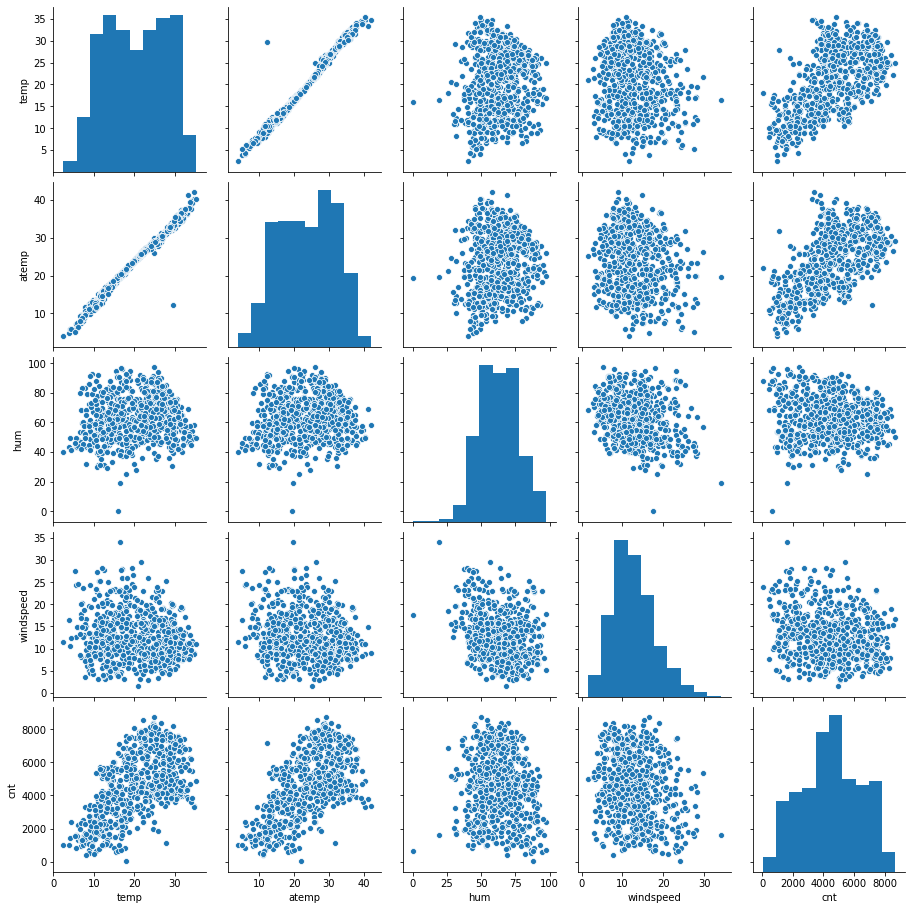

In [8]:
sns.pairplot(
    bike_sharing,
    x_vars=['temp', 'atemp', 'hum', 'windspeed','cnt'],
    y_vars=['temp', 'atemp', 'hum', 'windspeed','cnt'],
)
plt.show()

From the above pairplot, we can say that there is a strong positive correlation between `temp-atemp`. As per data dictionary the variables `temp` and `atemp` convey the same measure of temperature on that day. So, any one of the variable is sufficient for building the model. We can remove any one of them.

##### Drop the variable atemp

In [9]:
bike_sharing.drop(['atemp'], axis = 1, inplace = True)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


#### Visualising Categorical Variables

Let's visualise the categorical variables using boxplot.

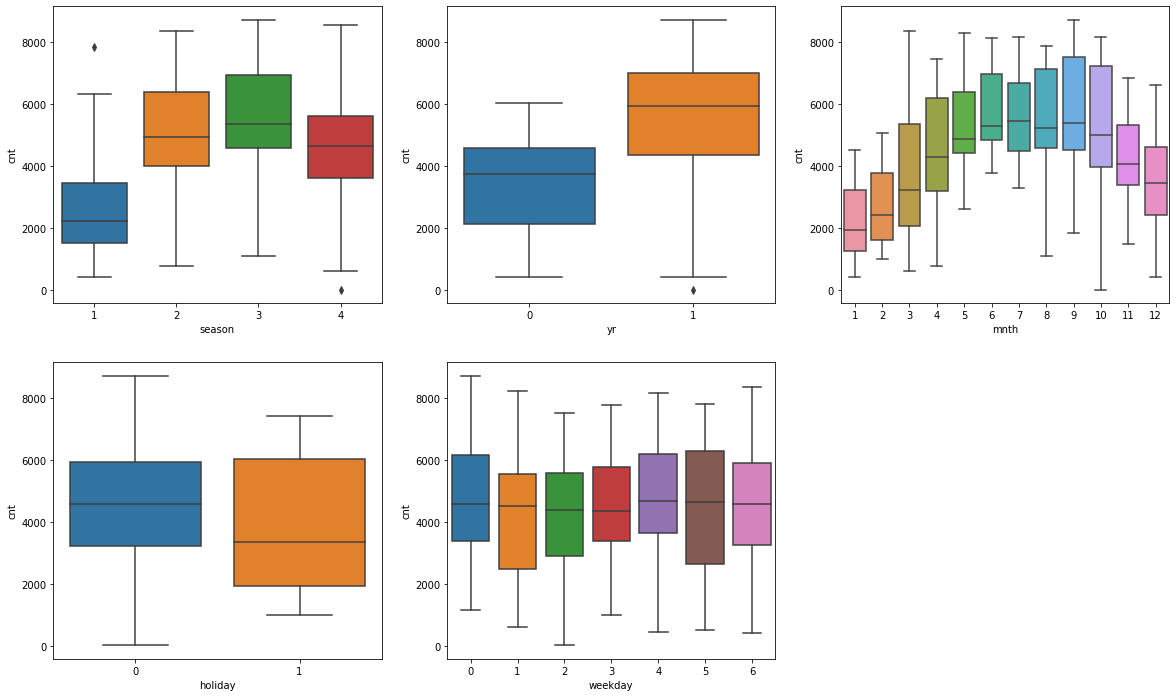

In [10]:
plt.figure(figsize=(20, 12)) 
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)



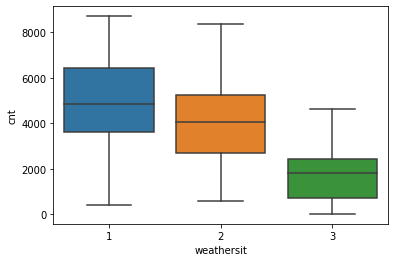

In [11]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()

### Categorising and creating dummies

Let us categorise the variables for `season`, `mnth`, `weekday` and `weathersit` 

In [12]:
#Categorising the column 'season'
conditions = [
    (bike_sharing['season'] == 1),
    (bike_sharing['season'] == 2),
    (bike_sharing['season'] == 3),
    ]
choices = ['spring', 'summer', 'fall']
bike_sharing['season'] = np.select(conditions, choices, default='winter')
bike_sharing.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,1,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,2,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,3,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,4,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,5,1,9.305237,43.6957,12.522300,1600


In [13]:
#Categorising the column 'mnth'
conditions = [
    (bike_sharing['mnth'] == 1),
    (bike_sharing['mnth'] == 2),
    (bike_sharing['mnth'] == 3),
    (bike_sharing['mnth'] == 4),
    (bike_sharing['mnth'] == 5),
    (bike_sharing['mnth'] == 6),
    (bike_sharing['mnth'] == 7),
    (bike_sharing['mnth'] == 8),
    (bike_sharing['mnth'] == 9),
    (bike_sharing['mnth'] == 10),
    (bike_sharing['mnth'] == 11)
    ]
choices = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
bike_sharing['mnth'] = np.select(conditions, choices, default='Dec')
bike_sharing.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,1,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,2,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,9.305237,43.6957,12.522300,1600


In [14]:
#Categorising the column 'weekday'
conditions = [
    (bike_sharing['weekday'] == 0),
    (bike_sharing['weekday'] == 1),
    (bike_sharing['weekday'] == 2),
    (bike_sharing['weekday'] == 3),
    (bike_sharing['weekday'] == 4),
    (bike_sharing['weekday'] == 5)
    ]
choices = ['Sun', 'Mon', 'Tue','Wed','Thu','Fri']
bike_sharing['weekday'] = np.select(conditions, choices, default='Sat')
bike_sharing.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,9.305237,43.6957,12.522300,1600


In [15]:
conditions = [
    (bike_sharing['weathersit'] == 1),
    (bike_sharing['weathersit'] == 2),
    (bike_sharing['weathersit'] == 3),
    ]
choices = ['Clear', 'Cloudy', 'Light snow rain']
bike_sharing['weathersit'] = np.select(conditions, choices, default='Heavy snow rain')
bike_sharing.head()


,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,Clear,9.305237,43.6957,12.522300,1600


In [16]:
#Creating dummies for 'season'
status = pd.get_dummies(bike_sharing['season'], drop_first = True)
bike_sharing = pd.concat([bike_sharing, status], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thu,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [17]:
#Creating dummies for 'mnth'
status = pd.get_dummies(bike_sharing['mnth'], drop_first = True)
bike_sharing = pd.concat([bike_sharing, status], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Mon,Cloudy,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,Cloudy,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,Clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thu,Clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [18]:
#Creating dummies for 'weekday'
status = pd.get_dummies(bike_sharing['weekday'], drop_first = True)
bike_sharing = pd.concat([bike_sharing, status], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Mon,Cloudy,14.110847,80.5833,10.749882,985,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,Cloudy,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Creating dummies for 'weathersit'
status = pd.get_dummies(bike_sharing['weathersit'], drop_first = True)
bike_sharing = pd.concat([bike_sharing, status], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light snow rain
0,spring,0,Jan,0,Mon,Cloudy,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tue,Cloudy,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   weathersit       730 non-null    object 
 6   temp             730 non-null    float64
 7   hum              730 non-null    float64
 8   windspeed        730 non-null    float64
 9   cnt              730 non-null    int64  
 10  spring           730 non-null    uint8  
 11  summer           730 non-null    uint8  
 12  winter           730 non-null    uint8  
 13  Aug              730 non-null    uint8  
 14  Dec              730 non-null    uint8  
 15  Feb              730 non-null    uint8  
 16  Jan              730 non-null    uint8  
 17  Jul             

#### For the categorical variables `season,mnth,weekday,weathersit`, dummy variables have been added. So we can drop those categorical variable columns

In [21]:
bike_sharing.drop(['season','mnth','weekday','weathersit',], axis = 1, inplace = True)

In [22]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   temp             730 non-null    float64
 3   hum              730 non-null    float64
 4   windspeed        730 non-null    float64
 5   cnt              730 non-null    int64  
 6   spring           730 non-null    uint8  
 7   summer           730 non-null    uint8  
 8   winter           730 non-null    uint8  
 9   Aug              730 non-null    uint8  
 10  Dec              730 non-null    uint8  
 11  Feb              730 non-null    uint8  
 12  Jan              730 non-null    uint8  
 13  Jul              730 non-null    uint8  
 14  Jun              730 non-null    uint8  
 15  Mar              730 non-null    uint8  
 16  May              730 non-null    uint8  
 17  Nov             

In [23]:
bike_sharing.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light snow rain
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
bike_sharing.shape

(730, 28)

## Step 4: Splitting the Data into Training and Testing Sets

Divide the dataset into train and test before building the data.<br>
**Train data** - build a model using train dataset <br>
**Test data** - evaluate the model (which is built with train dataset) using test dataset

In [25]:
from sklearn.model_selection import train_test_split

#Dividing the data into train(bs_train 70%) and test(bs_test - 30%)
bs_train, bs_test = train_test_split(bike_sharing, train_size = 0.70, test_size = 0.30, random_state = 100)

In [26]:
bs_train.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light snow rain
653,1,0,19.201653,55.8333,12.208807,7534,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,29.246653,70.4167,11.083475,7216,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,16.980847,62.1250,10.792293,4066,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,10.489153,48.3333,23.500518,1796,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,15.443347,48.9583,8.708325,4220,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
bs_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   temp             510 non-null    float64
 3   hum              510 non-null    float64
 4   windspeed        510 non-null    float64
 5   cnt              510 non-null    int64  
 6   spring           510 non-null    uint8  
 7   summer           510 non-null    uint8  
 8   winter           510 non-null    uint8  
 9   Aug              510 non-null    uint8  
 10  Dec              510 non-null    uint8  
 11  Feb              510 non-null    uint8  
 12  Jan              510 non-null    uint8  
 13  Jul              510 non-null    uint8  
 14  Jun              510 non-null    uint8  
 15  Mar              510 non-null    uint8  
 16  May              510 non-null    uint8  
 17  Nov            

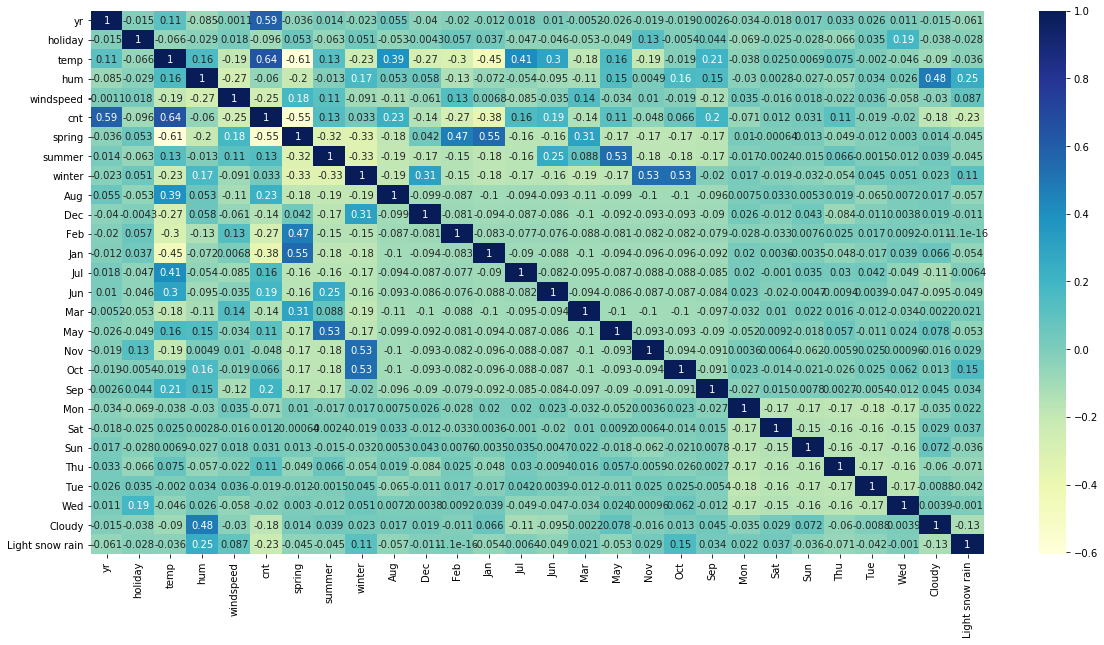

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bs_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observation** - From the heatmap, we can conform that the variables `yr` and `temp` are highly correlated

## Scaling

##### Scaling the train dataset

In [29]:
#MinMaxScaler from sklearn.preprocessing used for scaling
from sklearn.preprocessing import MinMaxScaler  

# Object Initiation to the class MinMaxScaler
scaler = MinMaxScaler()

# Apply fit_transform() to all the numerical columns except the 'dummy' variables

num_vars = ['temp','hum','windspeed','cnt']

bs_train[num_vars] = scaler.fit_transform(bs_train[num_vars])

In [30]:
#Check the shape after scaling
bs_train.shape

(510, 28)

### Dividing into X and y sets for the model building

In [31]:
#Here, the target variable is 'cnt'. So, y_train(y-axis) should contain 'cnt' 
#and X_train contains all the other independent variables(predictor).
y_train = bs_train.pop('cnt')
X_train = bs_train

In [32]:
X_train.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Cloudy',
       'Light snow rain'],
      dtype='object')

## RFE
##### Recursive feature elimination
Here using RFE, we need to fetch the 15 features. 15 features (independent) will be selected based on their rankings.

In [33]:
# Importing RFE for feature selection and LinearRegression for model building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
#Feature selection with RFE - 15 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [35]:
#Viewing the columns supported by RFE for model creation and their rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 12),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 4),
 ('Sat', False, 11),
 ('Sun', False, 8),
 ('Thu', False, 10),
 ('Tue', False, 3),
 ('Wed', False, 7),
 ('Cloudy', True, 1),
 ('Light snow rain', True, 1)]

In [36]:
#Fetch the columns which are supported by RFE (True)
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy',
       'Light snow rain'],
      dtype='object')

### Building model using statsmodel, with the variables selected by RFE - Manual (Backward Selection)

Now using the variables selected from RFE, we need to perform the Manual approach (Backward selection method). Build a model using all the 15 variables selected from RFE. Look into their p-values and VIF. Based on their values drop the variables one by one and arrive at a model which has a good Adjusted R-squared value,p-value for all variables(<0.05),VIF (<5) for all variables,F-stat and p(F-stat).

In [37]:
# Creating X_train dataframe with RFE selected variables(15 variables in this case)
X_train_rfe_features = X_train[col]
X_train_rfe_features.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Cloudy,Light snow rain
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


#### Creating a model with all 15 features

In [38]:
# Adding a constant variable as we are using statsmodel(which does not have constant so we need to add a constant manually)

import statsmodels.api as sm  
X_rfe_lm = sm.add_constant(X_train_rfe_features)

# Running the linear model
lm = sm.OLS(y_train,X_rfe_lm).fit()   

#Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        21:04:50   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036     

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor  

vif = pd.DataFrame()
X = X_train_rfe_features
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
13,Cloudy,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


Now, we have built a model with all 15 variables. We need to drop a variable based on the p-value and the VIF values(multicollinearity).<br>
We have to drop the variable which satisfies the following conditions in a sequential order <br>
 i.  If a varaible has High p-value,high VIF -> drop those variables first<br>
 ii. If a variable has High p,Low VIF drop these variables next<br>
 iii.If a variable has Low p,High VIF drop these variables after the ones above<br>  
 iv. If a varaible has Low p,Low VIF dont drop these variables<br>

Based on these conditions we have to drop the variables one by one.


#### Drop the variable `hum` 

All the variables has p-value less than 0.05. The variable `hum` has low p-value and high VIF(30.94). Let us drop the variable and rebuild the model again.

In [40]:
X = X.drop('hum', 1)

# Build a third fitted model
X_rfe_lm_1 = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_rfe_lm_1).fit()

# Print the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.57e-186
Time:                        21:04:50   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2466      0.032     

In [41]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy', 'Light snow rain'],
      dtype='object')

In [42]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
12,Cloudy,1.56


#### Drop the variable `temp` 

All the variables has p-value less than 0.05. The variable `temp` has low p-value and high VIF(5.17 which shows multicollinearity). Let us drop the variable and rebuild the model again.

In [43]:
X = X.drop('temp', 1)


# Build a third fitted model
X_rfe_lm_2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_rfe_lm_2).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.50e-160
Time:                        21:04:50   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5961      0.016     

In [44]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.88
3,spring,2.89
5,winter,2.84
4,summer,2.01
0,yr,1.83
9,Nov,1.79
7,Jan,1.64
11,Cloudy,1.52
6,Dec,1.45
8,Jul,1.20


#### Drop the variable `Jul` 

The p-value for the feature `Jul` is high(0.372) and it has a low VIF. Let us drop the variable.

In [45]:
X = X.drop('Jul', 1)


# Build a third fitted model
X_rfe_lm_3 = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_rfe_lm_3).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.36e-161
Time:                        21:04:50   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5892      0.014     

In [46]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.52
5,winter,2.74
3,spring,2.71
4,summer,1.86
8,Nov,1.79
0,yr,1.77
7,Jan,1.64
10,Cloudy,1.52
6,Dec,1.45
9,Sep,1.16


#### Drop the variable `winter` 

On analysing the summary, the variable `winter` has high p-value (0.342) and low VIF. So we can drop these and see what happens.

In [47]:
# Drop spring as it has high VIF (shows multicollinearity)
X = X.drop('winter', 1)


# Build a third fitted model
X_rfe_lm_4 = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_rfe_lm_4).fit()

# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.42e-162
Time:                        21:04:50   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5845      0.013     

In [48]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.22
3,spring,2.36
0,yr,1.74
4,summer,1.69
6,Jan,1.62
9,Cloudy,1.47
7,Nov,1.23
8,Sep,1.16
5,Dec,1.13
1,holiday,1.06


***Observation*** - Finally we have a model with following conditions.<br>
1. The p-value for all the variables is less than 0.05<br>
2. The VIF value for all the variables is less than 5<br>
3. The R-squared value is 0.792 (78 % to 85% is acceptable)<br>
3. The Adjusted R-squared value is 0.787 (78 % to 85% is acceptable)<br>
4. The F- Statistics value is 172.3(low)<br>
5. The p(F-statistics) is 7.42e-162<br>

All these shows that our model is significant. Let us do an residual analysis and verify it


## Residual Analysis - Train data

Let us check the major assumptions of Linear Regression - `error terms are also normally distributed`
Plot the histogram of the error terms.

In [49]:
X_rfe_lm_4.columns

Index(['const', 'yr', 'holiday', 'windspeed', 'spring', 'summer', 'Dec', 'Jan',
       'Nov', 'Sep', 'Cloudy', 'Light snow rain'],
      dtype='object')

###### Predict the y-values for the train dataset using the model

In [50]:
y_train_pred = lr_4.predict(X_rfe_lm_4)

###### Plot a distplot - to check whether the error terms are normally distributed with mean '0'

Text(0.5, 0, 'Errors')

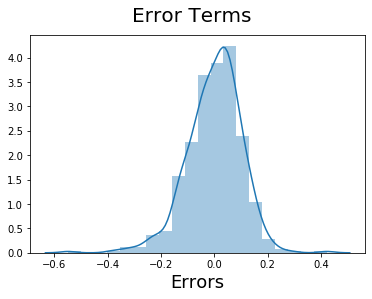

In [51]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

***Observation*** -  The assumptions that the error terms should be normally distributed with mean equal to 0 has been proved.

## Making Predictions using Test Data

#### Scaling the test data - Numerical variables

In [52]:
num_vars = ['temp','hum','windspeed','cnt']

bs_test[num_vars] = scaler.transform(bs_test[num_vars])

#### Dividing into X_test and y_test

In [53]:
#Here, the target variable is 'cnt'. So, y_test(y-axis) should contain 'cnt' 
#and X_test contains all the other independent variables(predictor).
y_test = bs_test.pop('cnt')
X_test = bs_test

In [54]:
X_test.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Cloudy',
       'Light snow rain'],
      dtype='object')

In [55]:
#Our test dataset should contain only the varaibles present in the train dataset which has been used to build the model finally.
col = X_rfe_lm_4.columns
col = col.drop("const",1)

In [56]:
col

Index(['yr', 'holiday', 'windspeed', 'spring', 'summer', 'Dec', 'Jan', 'Nov',
       'Sep', 'Cloudy', 'Light snow rain'],
      dtype='object')

#### Now let's use our model to make predictions.

In [57]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

#### Predicting the y_test_pred value for the test data using the model which we have created.

In [58]:
# Making predictions
y_test_pred = lr_4.predict(X_test_new)

## Model Evaluation

Let us calculate the r-squared value for the test data with the y_test and its predicted value (y_test_pred)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.7772012091843699

Text(0, 0.5, 'y_pred')

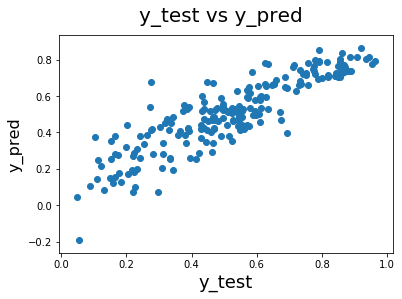

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

***Observation*** - From the above plot, we can say that the predicted y-values for the test data has been distributed linearly with the actual values of y in the test data. <br>

The **R-squared value of the train data is 0.79**, **Adjusted r-squared value is 0.79** whereas the **R-squared value of the test data is 0.78**. <br>

Hence, we can say that the designed model could predict the target variable `cnt` significantly for the unseen data <br>